# Loading Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [2]:
x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 

In [3]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)

In [4]:
x = x.values
y = (y.values).ravel()

In [5]:
x = x.astype(np.float32)

#normalize (don't know if I should do this)
x /= 255

In [ ]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
del(x)
del(y)
gc.collect()

# Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_x, train_y)

In [ ]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [ ]:
score = logisticRegr.score(valid_x, valid_y)
print(score)

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
#visualizing misclassified instances

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)

### Processing the data

In [6]:
def binarize_element(x, threshold = 200/255):
    if x > threshold:
        x = 1
        return x
    else:
        x = 0
        return x

In [7]:
def array_map(x):
    return map(binarize_element, x)

In [10]:
new_x = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x)):
    new_x[i] = list(array_map(x[i]))

In [12]:
import pandas as pd 
df = pd.DataFrame(new_x)

In [13]:
df.to_csv("./data/processed_x.csv", header = False, index = False)

In [21]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [22]:
x = x.values
x = x.astype(np.float32)

In [24]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

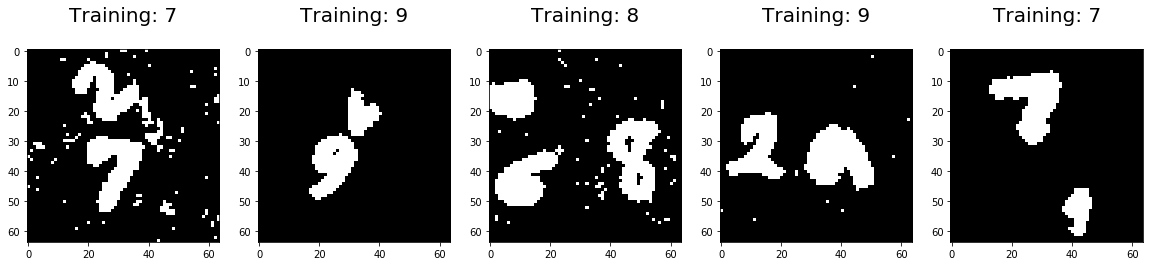

In [29]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

## Logistic Regression with Processed Data

In [26]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [27]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
score = logisticRegr.score(valid_x, valid_y)
print(score)

0.138


In [31]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [33]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

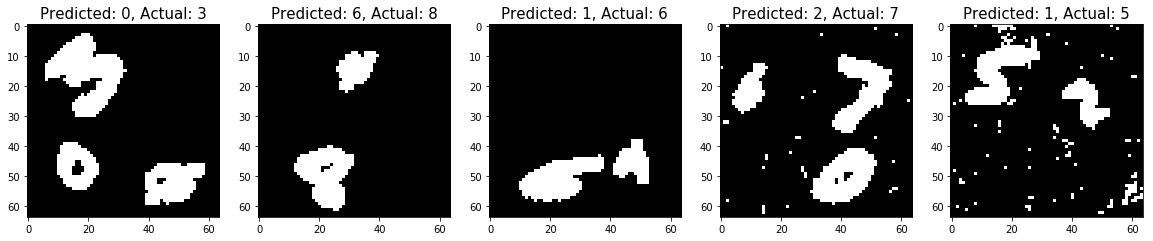

In [34]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)